In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

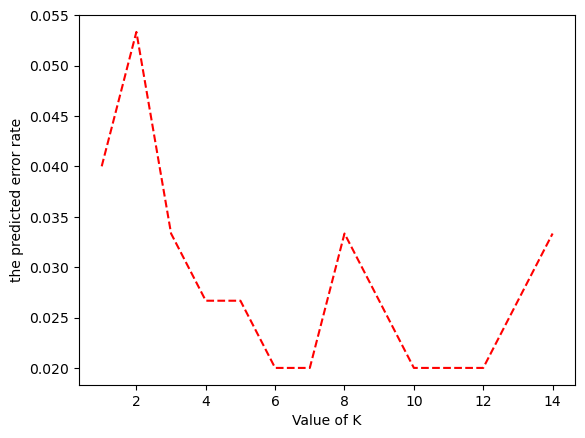

In [4]:
x,y = load_iris().data,load_iris().target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

k_range = range(1,15)
k_error = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    k_error.append(1-scores.mean())
    
plt.plot(k_range,k_error,'r--')
plt.xlabel('Value of K')
plt.ylabel('the predicted error rate')
plt.show()

In [7]:
knnmode = KNeighborsClassifier(n_neighbors=6)
Baggingmodel = BaggingClassifier(knnmode,n_estimators=130,max_samples=0.4,max_features=4,random_state=1)
knnmode.fit(x_train,y_train)
Baggingmodel.fit(x_train,y_train)
#评估
knn_pred = knnmode.predict(x_test)
knn_ac = accuracy_score(y_test,knn_pred)
print('knn模型的预测准确率:',knn_ac)
Bagging_pred = Baggingmodel.predict(x_test)
Bagging_ac = accuracy_score(y_test,Bagging_pred)
print('基于knn模型的Bagging的预测准确率:',Bagging_ac)

knn模型的预测准确率: 0.9333333333333333
基于knn模型的Bagging的预测准确率: 0.9466666666666667


In [1]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
import numpy as np


In [8]:
x,y = load_iris().data[:,2:4],load_iris().target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=50)

model = RandomForestClassifier(n_estimators=10,random_state=0)
model.fit(x_train,y_train)
#预测
y_pred = model.predict(x_test)
#评估
acc = accuracy_score(y_test,y_pred)
print('随机森林模型0预测准确率:',acc)

随机森林模型0预测准确率: 0.94


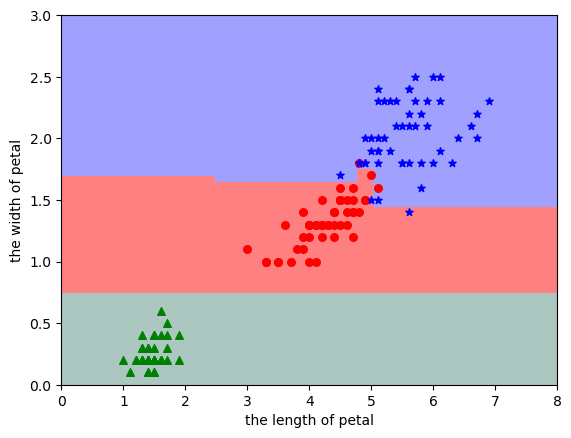

In [12]:
x1,x2 = np.meshgrid(np.linspace(0,8,500),np.linspace(0,3,500))
x_new = np.stack((x1.flat,x2.flat),axis=1)
y_predict =model.predict(x_new)
y_hat = y_predict.reshape(x1.shape)
iris_cmap = ListedColormap(['#ACC6C0','#FF8080','#A0A0FF'])
plt.contourf(x1,x2,y_hat,cmap=iris_cmap)

plt.scatter(x[y==0,0],x[y==0,1],s=30,c='g',marker='^')
plt.scatter(x[y==1,0],x[y==1,1],s=30,c='r',marker='o')
plt.scatter(x[y==2,0],x[y==2,1],s=30,c='b',marker='*')

plt.xlabel('the length of petal')
plt.ylabel('the width of petal')

plt.show()

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
from sklearn.tree import DecisionTreeClassifier

x,y = load_iris().data,load_iris().target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=50)
param_grid={'n_estimators':list(range(10,110,10)),'learning_rate':[0.0001,0.0005,0.001,0.005,0.01,0.05,0,6,0.7,0.8,0.9]}
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=420)
grid=GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=3),random_state=0),param_grid=param_grid,cv=cv)
grid.fit(x_train,y_train)

D:\conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 550.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "D:\conda\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\conda\envs\pytorch\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\conda\envs\pytorch\lib\site-packages\sklearn\utils\

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=420, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                          random_state=0),
             param_grid={'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01,
                                           0.05, 0, 6, 0.7, 0.8, 0.9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [37]:
model=grid.best_estimator_
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('最优参数值',grid.best_params_)
print('最优参数值对应的准确率为',acc)

最优参数值 {'learning_rate': 0.005, 'n_estimators': 40}
最优参数值对应的准确率为 0.96
